# Visualizing the 100 Prisioners Dilema
In this problem, 100 numbered prisoners must find their own numbers in one of 100 drawers in order to survive. The rules state that each prisoner may open only 50 drawers and cannot communicate with other prisoners.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [2]:
drawers = np.arange(100)

In [3]:
drawers

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

### Naive Approach

In [4]:
total_safe = []
for i in range(20000):
    safe = 0
    random_drawers = np.copy(drawers)
    np.random.shuffle(random_drawers)
    for prisioner in range(100):
        choices = np.random.choice(random_drawers,50,replace=False)
        if prisioner in choices:
            safe +=1
        
    total_safe.append(safe)

In [5]:
success_rate = total_safe.count(100)/len(total_safe)
success_rate

0.0

P(success) = 1/50 ** 100 ~ 0

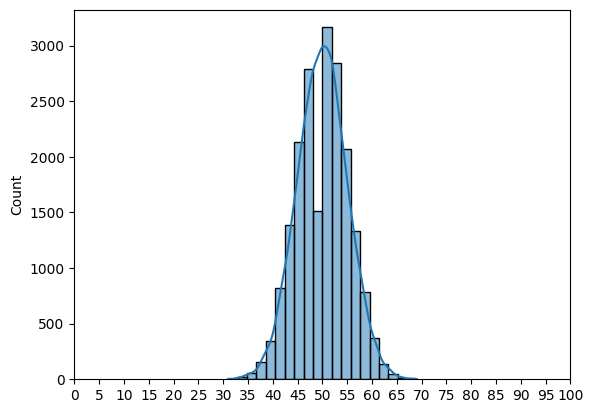

In [6]:
fig, ax = plt.subplots()
sns.histplot(total_safe,bins=20,kde=True,ax=ax)
ax.set_xlim(0,100)
ax.set_xticks(range(0,101,5))
plt.show()

### Best solution

In [7]:
total_safe = []
for i in range(20000):
    safe = 0
    random_drawers = np.copy(drawers)
    np.random.shuffle(random_drawers)
    for prisioner in range(100):
        choice = prisioner
        for j in range(50):
            if random_drawers[choice] == prisioner:
                safe +=1
                break
            choice = random_drawers[choice]
        
    total_safe.append(safe)

In [8]:
success_rate = total_safe.count(100)/len(total_safe)
success_rate

0.311

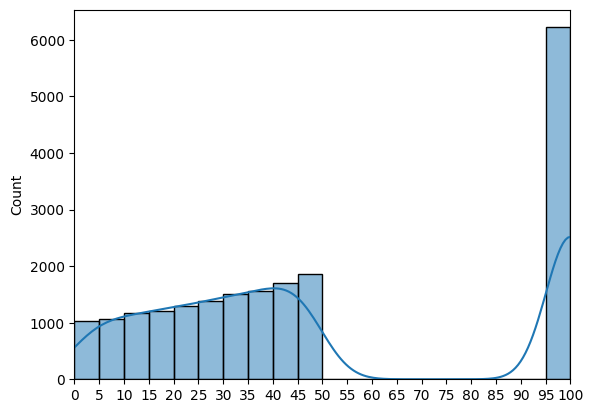

In [9]:
fig, ax = plt.subplots()
sns.histplot(total_safe,bins=20,kde=True,ax=ax)
ax.set_xlim(0,100)
ax.set_xticks(range(0,101,5))
plt.show()

#### Loops

In [10]:
def compute_loops(array):
    subloops = []
    subloops_len = []
    sub = []
    set_array = set(array)
    initial = array[next(iter(set_array))]
    while (len(set_array) != 0):
        sub.append(initial)
        set_array.remove(initial)
        initial = array[initial]
        if not(initial in set_array):
            subloops.append(sub)
            subloops_len.append(len(sub))
            sub = []
            try:
                initial = next(iter(set_array))
            except:
                break
    
    approved = max(subloops_len) <= len(array)/2

    return subloops,subloops_len,approved


#### An array is aproved if there is no sub loop with dimension greater than number of flips (n/2)

In [11]:
np.random.shuffle(random_drawers)
subloops,subloops_len,approved = compute_loops(random_drawers)
s = ""
for idx, e in enumerate(random_drawers):
    s += f'{idx}:{e}\t'
    if (idx+1) % 10 == 0:
        s+= '\n'

print(s)
print(subloops)
print(approved)


0:0	1:70	2:42	3:49	4:48	5:54	6:57	7:91	8:64	9:32	
10:25	11:75	12:20	13:89	14:11	15:38	16:22	17:53	18:10	19:47	
20:55	21:17	22:35	23:82	24:28	25:31	26:71	27:86	28:9	29:37	
30:44	31:92	32:21	33:79	34:94	35:4	36:34	37:13	38:66	39:52	
40:23	41:61	42:2	43:56	44:30	45:59	46:62	47:77	48:90	49:51	
50:80	51:24	52:27	53:73	54:39	55:99	56:45	57:93	58:50	59:67	
60:15	61:16	62:95	63:3	64:96	65:6	66:43	67:72	68:85	69:19	
70:8	71:65	72:12	73:81	74:36	75:40	76:98	77:68	78:88	79:74	
80:7	81:29	82:33	83:60	84:69	85:83	86:84	87:58	88:41	89:78	
90:5	91:1	92:76	93:63	94:14	95:97	96:18	97:46	98:26	99:87	

[[0], [1, 70, 8, 64, 96, 18, 10, 25, 31, 92, 76, 98, 26, 71, 65, 6, 57, 93, 63, 3, 49, 51, 24, 28, 9, 32, 21, 17, 53, 73, 81, 29, 37, 13, 89, 78, 88, 41, 61, 16, 22, 35, 4, 48, 90, 5, 54, 39, 52, 27, 86, 84, 69, 19, 47, 77, 68, 85, 83, 60, 15, 38, 66, 43, 56, 45, 59, 67, 72, 12, 20, 55, 99, 87, 58, 50, 80, 7, 91], [2, 42], [11, 75, 40, 23, 82, 33, 79, 74, 36, 34, 94, 14], [30, 44], [46, 62, 95, 97]]
False


In [12]:
total_safe = 0
safe = []
total_it = 1000000
for i in range(total_it):
    
    random_drawers = np.copy(drawers)
    np.random.shuffle(random_drawers)
    _,subloops_len, approved = compute_loops(random_drawers)
    safe.append(sum([i for i in subloops_len if (i <= (len(random_drawers)/2))]))
    if approved:
        total_safe += 1
    
        
rate = total_safe/total_it
print(f'Approval Rate: {rate}')

Approval Rate: 0.312213


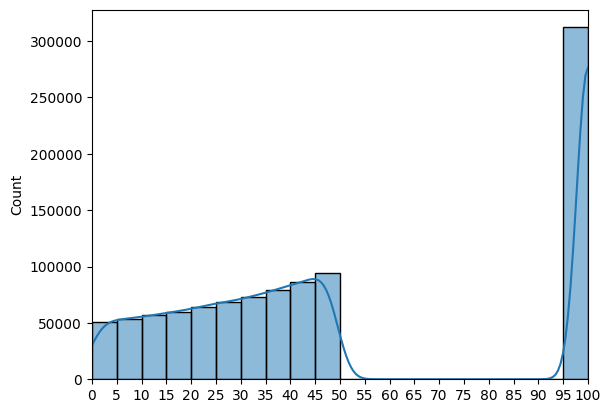

In [13]:
fig, ax = plt.subplots()
sns.histplot(safe,bins=20,kde=True,ax=ax)
ax.set_xlim(0,100)
ax.set_xticks(range(0,101,5))
plt.show()

##### P(success)?


P(success) = P(X <= 50) = 1- P(X > 50);

total_loops = 100!/100

P(X=100) = (100!/100)/100! = 1/100

P(X=N | N > len/2) = 1/N

P(success) = 1- sum_{i=51}^{100} 1/i ~ 1-0.69 = 0.31


#### Increasing the number of prisioners

In [14]:
n_prisioners = [2,3,4,5,6]
for p in n_prisioners:
    prisioners = 10**p
    prob = (1-sum([1/i for i in range(int(prisioners/2)+1,prisioners+1)]))*100
    print(f'Probability for {prisioners}\tis {prob:.6}%')

Probability for 100	is 31.1828%
Probability for 1000	is 30.7353%
Probability for 10000	is 30.6903%
Probability for 100000	is 30.6858%
Probability for 1000000	is 30.6853%


P(success) = 1 - P(fail)

p(fail) = integral_{n}^{2n} 1/x

for n -> inf
p(fail) = ln(2) <=> p(success) = 1-ln(2)~30.6852
